In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [2]:
pdg_train = np.abs(np.load('trainpdg.npy'))
pdg_test = np.abs(np.load('testpdg.npy'))

# Training data sets

In [3]:
trainangles = np.load('trainangles.npy', allow_pickle = True)
trainenergy = np.load('trainenergies.npy', allow_pickle = True)
trainbinfrac = np.load('trainbinfrac.npy', allow_pickle = True)
trainrsq = np.load('trainrsquare.npy', allow_pickle = True)
trainisTrack = np.load('trainisTrack.npy')
traindedx = np.load('dedx_train.npy', allow_pickle = True)

In [4]:
x_train = np.array(list(zip(trainangles, trainbinfrac, trainenergy, trainrsq)))

In [5]:
x_train

array([[14.31261616,  0.20238095,  0.18191113,  0.99312023],
       [ 1.51185943,  0.20512821,  0.23647127,  0.97985841],
       [ 5.77915535,  0.20588235,  0.28685775,  0.99722832],
       ...,
       [ 2.36683276,  0.22028986,  0.21082538,  0.99921892],
       [ 2.46280738,  0.20036101,  0.19711588,  0.99943964],
       [ 3.43693059,  0.21428571,  0.19193022,  0.99883645]])

In [6]:
y_train = trainisTrack

In [7]:
len(y_train)

117318

# Create and train BDT

In [8]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [9]:
bdt.score(x_train, y_train)

0.9428305971803134

# Testing data sets

In [10]:
testangles = np.load('testangles.npy', allow_pickle = True)
testenergy = np.load('testenergies - Copy.npy', allow_pickle = True)
testbinfrac = np.load('testbinfrac.npy', allow_pickle = True)
testrsq = np.load('testrsquare.npy', allow_pickle = True)
testisTrack = np.load('testisTrack.npy')
testdedx = np.load('dedx_test.npy', allow_pickle = True)

In [11]:
x_test = np.array(list(zip(testangles, testbinfrac, testenergy, testrsq)))

In [12]:
y_test = testisTrack

# Create and test BDT

In [13]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [14]:
bdt.score(x_test, y_test)

0.9421274008006892

# BDT training score

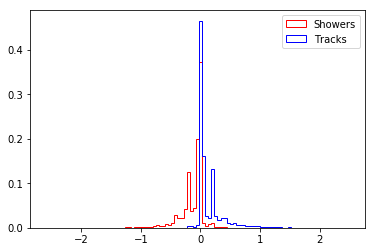

In [15]:
f_train = bdt.decision_function(x_train)
min_f_train = np.round(np.min(f_train), 1)
max_f_train = np.round(np.max(f_train), 1)
bins = np.linspace(min_f_train, max_f_train, 100)
cls_0_f_train = f_train[np.where(y_train == 0)]
cls_1_f_train = f_train[np.where(y_train == 1)]
weights_0 = np.ones_like(cls_0_f_train) / len(cls_0_f_train)
weights_1 = np.ones_like(cls_1_f_train) / len(cls_1_f_train)
plt.hist(cls_0_f_train, color='r', weights=weights_0, bins=bins, histtype='step', label='Showers')
plt.hist(cls_1_f_train, color='b', weights=weights_1, bins=bins, histtype='step', label='Tracks')
plt.legend()

# BDT testing score

In [16]:
#Which one do we talk about training or testing?

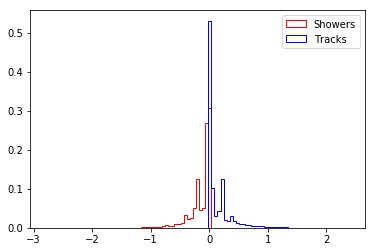

In [17]:
f_test = bdt.decision_function(x_test)
min_f_test = np.round(np.min(f_test), 1)
max_f_test = np.round(np.max(f_test), 1)
bins = np.linspace(min_f_test, max_f_test, 100)
cls_0_f_test = f_test[np.where(y_test == 0)]
cls_1_f_test = f_test[np.where(y_test == 1)]
weights_0 = np.ones_like(cls_0_f_test) / len(cls_0_f_test)
weights_1 = np.ones_like(cls_1_f_test) / len(cls_1_f_test)
plt.hist(cls_0_f_test, color='r', weights=weights_0, bins=bins, histtype='step', label='Showers')
plt.hist(cls_1_f_test, color='b', weights=weights_1, bins=bins, histtype='step', label='Tracks')
plt.legend()

# Track particle id training sample

In [18]:
tracks_train = np.where(f_train > 0)[0]
tracks_test = np.where(f_test > 0)[0]

In [19]:
pdg2_train = pdg_train[tracks_train]

In [20]:
for n, i in enumerate(pdg2_train):
    if i == 11:
        pdg2_train[n] = 0
    elif i == 22:
        pdg2_train[n] = 0
    elif i == 321: 
        pdg2_train[n] = 0
    elif i == 2112: 
        pdg2_train[n] = 0
    elif i == 3112:
        pdg2_train[n] = 0
    elif i == 3222:
        pdg2_train[n] = 0      

# Track particle id testing sample

In [21]:
pdg2_test = pdg_test[tracks_test]

In [22]:
set(pdg2_test)

{11, 13, 22, 211, 321, 2112, 2212, 3112, 3222}

In [23]:
for n, i in enumerate(pdg2_test):
    if i == 11:
        pdg2_test[n] = 0
    elif i == 22:
        pdg2_test[n] = 0
    elif i == 321: 
        pdg2_test[n] = 0
    elif i == 2112: 
        pdg2_test[n] = 0
    elif i == 3112:
        pdg2_test[n] = 0
    elif i == 3222:
        pdg2_test[n] = 0      

In [24]:
tracks_train = np.where(f_train > 0)[0]
tracks_test = np.where(f_test > 0)[0]

In [25]:
trainangles_tracks = trainangles[tracks_train]
trainenergy_tracks = trainenergy[tracks_train]
trainbinfrac_tracks= trainbinfrac[tracks_train]
trainrsq_tracks = trainrsq[tracks_train]

In [26]:
testangles_tracks = testangles[tracks_test]
testenergy_tracks = testenergy[tracks_test]
testbinfrac_tracks = testbinfrac[tracks_test]
testrsq_tracks = testrsq[tracks_test]

In [27]:
#Variables values with bdt score > 0
np.save('trainangles_t.npy', trainangles_tracks)
np.save('trainenergy_t.npy', trainenergy_tracks)
np.save('trainbinfrac_t.npy', trainbinfrac_tracks)
np.save('trainrsq_t.npy', trainrsq_tracks)

In [28]:
np.save('testangles_t.npy', testangles_tracks)
np.save('testenergy_t.npy', testenergy_tracks)
np.save('testbinfrac_t.npy', testbinfrac_tracks)
np.save('testrsq_t.npy', testrsq_tracks)

In [29]:
np.save('pdg2_train.npy', pdg2_train)
np.save('pdg2_test.npy', pdg2_test)

# Confusion Matrix training 

In [30]:
#PDGs predicted by the 4 cat BDT
pred_train = np.load('fourcat_pred_train.npy')
pred_test = np.load('fourcat_pred_test.npy')

In [31]:
pred_train[:100]

array([  13,   13,    0,   13, 2212,   13, 2212,   13, 2212,   13, 2212,
         13, 2212,   13, 2212,   13,    0, 2212, 2212, 2212,  211,   13,
       2212,   13,    0,   13, 2212,    0, 2212, 2212,   13, 2212,   13,
       2212, 2212, 2212,   13,   13, 2212, 2212,   13, 2212,   13, 2212,
         13, 2212,   13, 2212, 2212, 2212,    0, 2212,   13,   13, 2212,
       2212,   13,   13,   13,   13,   13,   13,   13,   13,   13,    0,
       2212,   13,   13, 2212,   13,  211, 2212,   13,    0,   13, 2212,
         13, 2212, 2212,   13,    0, 2212, 2212, 2212,   13, 2212, 2212,
         13, 2212,   13,   13,    0, 2212, 2212,   13,   13,   13,  211,
         13])

In [32]:
#True PDG values
pdg2_train[:100]

array([  13, 2212, 2212,   13, 2212, 2212, 2212,   13, 2212,   13,  211,
         13,   13,   13, 2212,   13,    0,    0, 2212, 2212,   13, 2212,
       2212, 2212, 2212, 2212, 2212,    0, 2212, 2212,   13, 2212, 2212,
       2212,   13, 2212,   13,   13,   13, 2212,   13, 2212,   13,   13,
         13, 2212,   13, 2212, 2212, 2212,    0, 2212, 2212,   13, 2212,
       2212,   13,   13,   13,   13,   13,   13,  211,   13, 2212,   13,
       2212,   13,   13, 2212,   13,  211, 2212,   13,   13,   13,   13,
         13, 2212, 2212,  211,   13, 2212, 2212, 2212, 2212,   13, 2212,
         13, 2212,   13,   13,    0,   13, 2212,   13,   13,  211,  211,
         13])

In [33]:
true_muon_train = np.where(pdg2_train == 13)[0]
true_proton_train = np.where(pdg2_train == 2212)[0]
true_pion_train = np.where(pdg2_train == 211)[0]
true_other_train = np.where(pdg2_train == 0)[0]

In [34]:
pred_muon_train = np.where(pred_train == 13)[0]
pred_proton_train = np.where(pred_train == 2212)[0]
pred_pion_train = np.where(pred_train == 211)[0]
pred_other_train = np.where(pred_train == 0)[0]

In [35]:
mumu_train = len(np.intersect1d(true_muon_train, pred_muon_train))/len(true_muon_train)
protprot_train = len(np.intersect1d(true_proton_train, pred_proton_train))/len(true_proton_train)
pipi_train = len(np.intersect1d(true_pion_train, pred_pion_train))/len(true_pion_train)
otherother_train = len(np.intersect1d(true_other_train, pred_other_train))/len(true_other_train)

In [36]:
mumu_train

0.7564461421938288

In [37]:
protprot_train

0.7948968755240065

In [38]:
pipi_train

0.23242630385487528

In [39]:
otherother_train

0.5202740492170023

In [40]:
muprot_train = len(np.intersect1d(true_muon_train, pred_proton_train))/len(true_muon_train)
mupi_train = len(np.intersect1d(true_muon_train, pred_pion_train))/len(true_muon_train)
muother_train = len(np.intersect1d(true_muon_train, pred_other_train))/len(true_muon_train)

In [41]:
muprot_train

0.1875720354332005

In [42]:
mupi_train

0.02789211973523891

In [43]:
muother_train

0.028089702637731747

In [44]:
protmu_train = len(np.intersect1d(true_proton_train, pred_muon_train))/len(true_proton_train)
protpi_train = len(np.intersect1d(true_proton_train, pred_pion_train))/len(true_proton_train)
protother_train = len(np.intersect1d(true_proton_train, pred_other_train))/len(true_proton_train)

In [45]:
protmu_train

0.16077916270750656

In [46]:
protpi_train

0.014560393493935498

In [47]:
protother_train

0.02976356827455145

In [48]:
pimu_train = len(np.intersect1d(true_pion_train, pred_muon_train))/len(true_pion_train) 
piprot_train = len(np.intersect1d(true_pion_train, pred_proton_train))/len(true_pion_train)
piother_train = len(np.intersect1d(true_pion_train, pred_other_train))/len(true_pion_train)

In [49]:
pimu_train

0.4261148904006047

In [50]:
piprot_train

0.28703703703703703

In [51]:
piother_train

0.05442176870748299

In [52]:
othermu_train = len(np.intersect1d(true_other_train, pred_muon_train))/len(true_other_train) 
otherprot_train = len(np.intersect1d(true_other_train, pred_proton_train))/len(true_other_train)
otherpi_train = len(np.intersect1d(true_other_train, pred_pion_train))/len(true_other_train)

In [53]:
othermu_train

0.1960290827740492

In [54]:
otherprot_train

0.2701342281879195

In [55]:
otherpi_train

0.013562639821029083

# Confusion Matrix testing

In [56]:
true_muon_test = np.where(pdg2_test == 13)[0]
true_proton_test = np.where(pdg2_test == 2212)[0]
true_pion_test = np.where(pdg2_test == 211)[0]
true_other_test = np.where(pdg2_test == 0)[0]

In [57]:
pred_muon_test = np.where(pred_test == 13)[0]
pred_proton_test = np.where(pred_test == 2212)[0]
pred_pion_test = np.where(pred_test == 211)[0]
pred_other_test = np.where(pred_test == 0)[0]

In [58]:
mumu_test = len(np.intersect1d(true_muon_test, pred_muon_test))/len(true_muon_test)
protprot_test = len(np.intersect1d(true_proton_test, pred_proton_test))/len(true_proton_test)
pipi_test = len(np.intersect1d(true_pion_test, pred_pion_test))/len(true_pion_test)
otherother_test = len(np.intersect1d(true_other_test, pred_other_test))/len(true_other_test)

In [59]:
muonscalledmuons = len(np.intersect1d(true_muon_test, pred_muon_test))
muonscalledprotons = len(np.intersect1d(true_muon_test, pred_proton_test))
muonscalledpions = len(np.intersect1d(true_muon_test, pred_pion_test))
muonscalledother = len(np.intersect1d(true_muon_test, pred_other_test))

In [60]:
mumu_test

0.7138346727898967

In [61]:
protprot_test

0.8042596897129575

In [62]:
pipi_test

0.2543888704869162

In [63]:
otherother_test

0.3960073334691383

In [64]:
muprot_test = len(np.intersect1d(true_muon_test, pred_proton_test))/len(true_muon_test)
mupi_test = len(np.intersect1d(true_muon_test, pred_pion_test))/len(true_muon_test)
muother_test = len(np.intersect1d(true_muon_test, pred_other_test))/len(true_muon_test)

In [65]:
muprot_test

0.20863630565123104

In [66]:
mupi_test

0.05683122847301952

In [67]:
muother_test

0.020697793085852786

In [68]:
protmu_test = len(np.intersect1d(true_proton_test, pred_muon_test))/len(true_proton_test)
protpi_test = len(np.intersect1d(true_proton_test, pred_pion_test))/len(true_proton_test)
protother_test = len(np.intersect1d(true_proton_test, pred_other_test))/len(true_proton_test)

In [69]:
protmu_test

0.15017027947456618

In [70]:
protpi_test

0.02321747121466025

In [71]:
protother_test

0.0223525595978161

In [72]:
pimu_test = len(np.intersect1d(true_pion_test, pred_muon_test))/len(true_pion_test) 
piprot_test = len(np.intersect1d(true_pion_test, pred_proton_test))/len(true_pion_test)
piother_test = len(np.intersect1d(true_pion_test, pred_other_test))/len(true_pion_test)

In [73]:
pionscalledpions = len(np.intersect1d(true_pion_test, pred_pion_test))
pionscalledmuons = len(np.intersect1d(true_pion_test, pred_muon_test))
pionscalledprotons = len(np.intersect1d(true_pion_test, pred_proton_test))
pionscalledother = len(np.intersect1d(true_pion_test, pred_other_test))

In [74]:
protcalledprot = len(np.intersect1d(true_proton_test, pred_proton_test))
protcalledmu = len(np.intersect1d(true_proton_test, pred_muon_test))
protcalledpi = len(np.intersect1d(true_proton_test, pred_pion_test))
protcalledother = len(np.intersect1d(true_proton_test, pred_other_test))

In [75]:
pimu_test

0.38953295793309045

In [76]:
piprot_test

0.3181517058628685

In [77]:
piother_test

0.03792646571712487

In [78]:
othermu_test = len(np.intersect1d(true_other_test, pred_muon_test))/len(true_other_test) 
otherprot_test = len(np.intersect1d(true_other_test, pred_proton_test))/len(true_other_test)
otherpi_test = len(np.intersect1d(true_other_test, pred_pion_test))/len(true_other_test)

In [79]:
othermu_test

0.2493379507027908

In [80]:
otherprot_test

0.33224689346099

In [81]:
otherpi_test

0.022407822367080873

In [82]:
#pipi = pion identified as a pion
piasmu = np.intersect1d(true_pion_test, pred_muon_test)
piasprot = np.intersect1d(true_pion_test, pred_proton_test)
piaspi = np.intersect1d(true_pion_test, pred_pion_test)

In [83]:
muasmu = np.intersect1d(true_muon_test, pred_muon_test)
protasprot = np.intersect1d(true_proton_test, pred_proton_test)

In [84]:
np.save('piaspi.npy', piaspi)
np.save('piasmu.npy', piasmu)
np.save('piasprot.npy', piasprot)
np.save('muasmu.npy', muasmu)
np.save('protasprot.npy', protasprot)

In [85]:
wirePos_test = np.load('test_wirePos.npy')
driftPos_test = np.load('test_driftPos.npy')

In [86]:
wirePos_tracks = wirePos_test[tracks_test]
driftPos_tracks = driftPos_test[tracks_test]

# Pions identified as pions

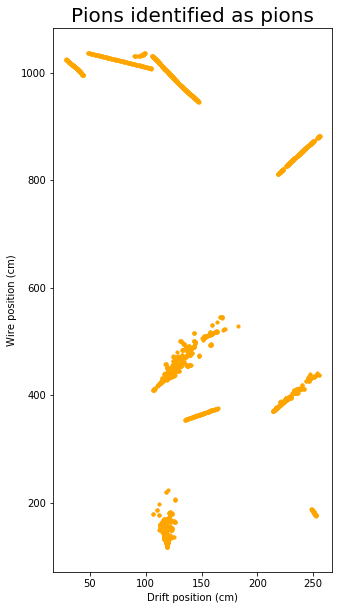

In [87]:
plt.figure(figsize=(5,10))
plt.scatter(np.concatenate(driftPos_test[piaspi[:10]]), np.concatenate(wirePos_test[piaspi[:10]]), color = 'orange', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Pions identified as pions', fontsize = 20)
plt.savefig('pionsaspionsfourcat.png')

# Pions identified as muons

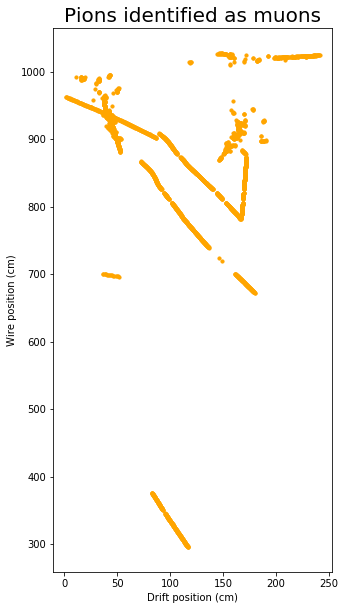

In [88]:
plt.figure(figsize=(5,10))
plt.scatter(np.concatenate(driftPos_test[piasmu[:10]]), np.concatenate(wirePos_test[piasmu[:10]]), color = 'orange', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Pions identified as muons', fontsize = 20)
plt.savefig('pionsasmuonsfourcat.png')

# Pions identified as protons

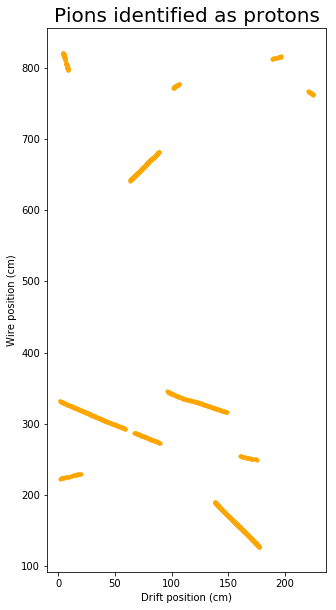

In [89]:
plt.figure(figsize=(5,10))
plt.scatter(np.concatenate(driftPos_test[piasprot[:10]]), np.concatenate(wirePos_test[piasprot[:10]]), color = 'orange', s = 10)
plt.xlabel('Drift position (cm)')
plt.ylabel('Wire position (cm)')
plt.title('Pions identified as protons', fontsize = 20)
plt.savefig('pionsasprotonsfourcat.png')
plt.show()

# BDT assessment

In [90]:
mu_completeness = muonscalledmuons / ((muonscalledmuons) + (muonscalledprotons) + (muonscalledpions) + (muonscalledother))
mu_completeness

0.7138346727898967

In [93]:
mu_uncertainty = (mu_completeness * (1 - mu_completeness)) / ((muonscalledmuons) + (muonscalledprotons) + (muonscalledpions) + (muonscalledother))
mu_uncertainty

6.514693606098923e-06

In [91]:
pi_completeness = pionscalledpions / ((pionscalledpions) + (pionscalledmuons) + (pionscalledprotons) + (pionscalledother))
pi_completeness

0.2543888704869162

In [94]:
pi_uncertainty = (pi_completeness * (1 - pi_completeness)) / ((pionscalledpions) + (pionscalledprotons) + (pionscalledpions) + (pionscalledother))
pi_uncertainty

3.632232345065247e-05

In [92]:
proton_completeness = protcalledprot / ((protcalledprot) + (protcalledpi) + (protcalledmu) + (protcalledother))
proton_completeness 

0.8042596897129575

In [102]:
prot_uncertainty = (proton_completeness * (1 - proton_completeness)) / ((protcalledprot) + (protcalledprot) + (protcalledprot) + (protcalledother))
prot_uncertainty

1.7473338278014854e-06